<a href="https://colab.research.google.com/github/npuneeth/York_Univ_NLP/blob/main/Milestone_3_Model_Selection_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Project: Disaster Tweet Prediction** 
## *Milestone 3: Model Selection and Optimization* 
**CSML-1010 | By GROUP 3 & 4** (*Jean-Jacques Rousseau, David Geller, Kwangjin Park, Petr Kocourek and Puneeth Nagarajaiah, Imdad Khan*)

### Goal: We are going to implement various optimized models and perform benchmark measures to find the best models.

## **Table of Content:**

1. Installation
2. Word2Vec & TF-IDF
3. BERT 
4. GloVe & LSTM
5. Conclusion
6. Bibliography





##1. Installation

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

In [ ]:
#for panda profiling and plotting
! pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
pd.options.display.max_colwidth = 200

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
#Processed training data from Milestone 1
df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Keyword,Location,Document,Target
0,body bag,new york,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
1,detonation,bangalore india,new smp ignition knock detonation sensor ks,0
2,fire truck,nevada carson cityfreeman st,rgj truck trailer catches fire reno,1
3,derailment,india,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1
4,blight,central illinois,wanted see info blight u got,1


In [ ]:
df.shape

(7000, 4)

In [ ]:
corpus = np.array(df['Document'])

In [ ]:
#Just showing tweets
corpus

array(['new ladies shoulder tote handbag women cross body bag faux leather fashion purse full',
       'new smp ignition knock detonation sensor ks',
       'rgj truck trailer catches fire reno', ...,
       'bought oz jar peanut butter getting demolished',
       'plan work dont panic bc letters like feel like may running letters thoughts',
       'hi david saw usa walk war destroyed lives millions prevent repeat irandeal'],
      dtype=object)

#2. Word2Vec & TF-IDF




In [ ]:
#clean_text_tok contains tokenized tweet
df['clean_text_tok']=[nltk.word_tokenize(str(i)) for i in corpus] #convert preprocessed sentence to tokenized sentence

#min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
model = Word2Vec(df['clean_text_tok'],min_count=2)  

#combination of word and its vector
w2v = dict(zip(model.wv.index2word, model.wv.syn0))  

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
df['clean_text_tok']

0            [new, ladies, shoulder, tote, handbag, women, cross, body, bag, faux, leather, fashion, purse, full]
1                                                             [new, smp, ignition, knock, detonation, sensor, ks]
2                                                                      [rgj, truck, trailer, catches, fire, reno]
3       [helping, hand, mumbai, ttes, take, charge, helpline, calm, anxious, relatives, indian, exp, mumbaitimes]
4                                                                             [wanted, see, info, blight, u, got]
                                                          ...                                                    
6995                                                                             [wow, crushed, edwing, bluejays]
6996                                                  [watch, super, strong, magnets, destroy, everyday, objects]
6997                                                       [bought, oz, jar, peanut, but

In [ ]:
vocabulary = model.wv.vocab
print(vocabulary)

{'new': <gensim.models.keyedvectors.Vocab object at 0x7f29f11ba280>, 'ladies': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b20df0>, 'shoulder': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b20520>, 'tote': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b204f0>, 'handbag': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b20e50>, 'women': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b2d1c0>, 'cross': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b2d220>, 'body': <gensim.models.keyedvectors.Vocab object at 0x7f29f21e78b0>, 'bag': <gensim.models.keyedvectors.Vocab object at 0x7f29f5f7f910>, 'faux': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b19340>, 'leather': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b19e20>, 'fashion': <gensim.models.keyedvectors.Vocab object at 0x7f29f5b192e0>, 'purse': <gensim.models.keyedvectors.Vocab object at 0x7f29f13fc040>, 'full': <gensim.models.keyedvectors.Vocab object at 0x7f29f13fc0a0>, 'ignition': <gens

In [ ]:
v1 = model.wv['wildfires']
print(v1)

[-5.6770686e-03 -3.5261794e-03  3.5318027e-03 -3.7544277e-03
 -1.3362099e-03  4.4503296e-03  7.5038348e-04 -1.3707485e-03
 -8.3491660e-04  5.9312035e-05 -2.3805511e-03 -2.9090536e-03
  6.6731690e-04 -9.1982335e-03 -3.7905546e-03 -1.9207642e-03
  8.1827625e-04 -6.6304225e-03 -1.7132594e-03  3.2822606e-03
  5.9915977e-03 -2.0917456e-03 -8.8470029e-03  5.7412186e-03
 -9.3012555e-03 -2.8840378e-03  5.6144624e-04  8.7478571e-04
 -6.3316757e-03 -2.7126928e-03  4.3197707e-03 -6.9027445e-03
  6.3349227e-03 -3.0792137e-03 -5.2746153e-03 -3.5537132e-03
 -1.4090656e-03 -3.1362462e-03 -1.0734954e-03 -6.4708740e-03
 -3.9423001e-03 -2.3588282e-03 -2.1036670e-03  6.9980096e-04
  3.2342994e-03 -4.8571764e-03 -3.0332913e-03  2.4895626e-03
  5.9385574e-03  3.2319489e-03 -1.7934153e-03  6.9644477e-04
  3.3157358e-03  4.8911609e-03  5.2547334e-03  2.4508665e-04
  3.2126829e-03 -3.4322829e-03  1.4479969e-03  5.7534460e-05
  2.0095082e-03  2.1708170e-06  2.1014854e-03 -1.5234972e-03
 -8.6573856e-03 -7.18932

In [ ]:
sim_words = model.wv.most_similar('wildfires')

In [ ]:
for x in sim_words:
  print(x)

('times', 0.7822160720825195)
('bioterror', 0.7821515202522278)
('actually', 0.7801263928413391)
('probably', 0.77909916639328)
('thunder', 0.7787796258926392)
('spot', 0.7773498296737671)
('wanted', 0.7754741311073303)
('x', 0.7743881940841675)
('hazard', 0.7743241786956787)
('sex', 0.7735993266105652)


In [ ]:
pairs = [
    ('wildfires', 'flood'),   
    ('wildfires', 'panic'),   
    ('wildfires', 'war'),  
    ('wildfires', 'indian'),    
    ('wildfires', 'fire'),
    ('wildfires', 'calm'),
]
for w1, w2 in pairs:
    print('%r\t%r\t\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

'wildfires'	'flood'		0.75
'wildfires'	'panic'		0.77
'wildfires'	'war'		0.76
'wildfires'	'indian'		0.74
'wildfires'	'fire'		0.76
'wildfires'	'calm'		0.67


### Train test splitting of labelled dataset (To be used later when creating classification models)



In [ ]:
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
x_train, x_val, y_train, y_val = train_test_split(df["Document"], df["Target"], test_size=0.2, shuffle=True)

x_train_tok= [nltk.word_tokenize(str(i)) for i in x_train]  #for word2vec
x_val_tok= [nltk.word_tokenize(str(i)) for i in x_val]      #for word2vec

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train.values.astype('U')) #tfidf runs on non-tokenized sentences unlike word2vec

# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(x_val.values.astype('U'))

In [ ]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
x_train_vectors_w2v = modelw.transform(x_train_tok)
x_val_vectors_w2v = modelw.transform(x_val_tok)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

### Logistic regression (TF-IDF)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       820
           1       0.77      0.69      0.73       580

    accuracy                           0.79      1400
   macro avg       0.78      0.77      0.78      1400
weighted avg       0.78      0.79      0.78      1400

Confusion Matrix: [[700 120]
 [180 400]]
AUC: 0.8527828006728343


### Naive Bayes (TF-IDF)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       820
           1       0.83      0.66      0.73       580

    accuracy                           0.80      1400
   macro avg       0.81      0.78      0.79      1400
weighted avg       0.81      0.80      0.80      1400

Confusion Matrix: [[743  77]
 [199 381]]
AUC: 0.8556318334735072


### Logistic Regression (Word2Vec)

In [ ]:
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(x_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(x_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(x_val_vectors_w2v)[:,1]
 
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.60      0.98      0.74       820
           1       0.73      0.08      0.14       580

    accuracy                           0.61      1400
   macro avg       0.66      0.53      0.44      1400
weighted avg       0.65      0.61      0.49      1400

Confusion Matrix: [[803  17]
 [535  45]]
AUC: 0.611449747687132


#3. BERT

BERT process includes two models.

 

* DistilBERT processes the sentence and passes along some
information it extracted from it on to the next model. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. It’s a lighter and faster version of BERT that roughly matches its performance.

* The next model, a Classification Model, will take in the result of DistilBERT’s processing, and classify the tweet as either real or fake (1 or 0, respectively).

* Classification Models used for this part of the project are:
  

1.   Logistic Regression
2.   Decision Tree
3. Random Forest
4. Gradient Boost and  
5. XG Boost

## Loading and filtering dataset

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
pd.options.display.max_colwidth = 200

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Processed training data from Milestone 1
train_data = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv', header=None)

In [ ]:
#preview of dataset
train_data.head()

,0,1,2,3,4
0,NaN,Keyword,Location,Document,Target
1,0.0,body bag,new york,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
2,1.0,detonation,bangalore india,new smp ignition knock detonation sensor ks,0
3,2.0,fire truck,nevada carson cityfreeman st,rgj truck trailer catches fire reno,1
4,3.0,derailment,india,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1


In [ ]:
# we will retain variables 'Document' and 'Target'
train_data=train_data[[3,4]]
train_data.head()

,3,4
0,Document,Target
1,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
2,new smp ignition knock detonation sensor ks,0
3,rgj truck trailer catches fire reno,1
4,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1


In [ ]:
#since first row is header from previous dataframe, we will drop it 
train_data.drop(index=train_data.index[0], axis=0, inplace=True)
train_data

,3,4
1,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
2,new smp ignition knock detonation sensor ks,0
3,rgj truck trailer catches fire reno,1
4,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1
5,wanted see info blight u got,1
...,...,...
6996,wow crushed edwing bluejays,0
6997,watch super strong magnets destroy everyday objects,1
6998,bought oz jar peanut butter getting demolished,0
6999,plan work dont panic bc letters like feel like may running letters thoughts,0


In [ ]:
#reset index
train_data.reset_index(drop=True, inplace=True)
train_data

,3,4
0,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
1,new smp ignition knock detonation sensor ks,0
2,rgj truck trailer catches fire reno,1
3,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1
4,wanted see info blight u got,1
...,...,...
6995,wow crushed edwing bluejays,0
6996,watch super strong magnets destroy everyday objects,1
6997,bought oz jar peanut butter getting demolished,0
6998,plan work dont panic bc letters like feel like may running letters thoughts,0


In [ ]:
# drop rows with null values
train_data=train_data.dropna()

In [ ]:
train_data.reset_index(drop=True, inplace=True)
train_data

,3,4
0,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
1,new smp ignition knock detonation sensor ks,0
2,rgj truck trailer catches fire reno,1
3,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1
4,wanted see info blight u got,1
...,...,...
6992,wow crushed edwing bluejays,0
6993,watch super strong magnets destroy everyday objects,1
6994,bought oz jar peanut butter getting demolished,0
6995,plan work dont panic bc letters like feel like may running letters thoughts,0


## Data pre-processing for BERT

In [ ]:
# loading librariers for BERT and Classification
import numpy as np
import pandas as pd
import torch
!pip install transformers
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# load distilBert Model
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
##Initial runtimes with full dataset and even 3500 rows crashed. So we have decided to try with 2k samples
batch_1 = train_data[:2000]

In [ ]:
#check for high imbalance
batch_1[4].value_counts()

0    1135
1     865
Name: 4, dtype: int64

Before we can hand our sentences to BERT, we need to do some minimal processing to put them in the format it requires.

**Tokenization:**
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with.

In [ ]:
tokenized = batch_1[3].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

**Padding:**
After tokenization, tokenized is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths).

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

Our dataset is now in the padded variable, we can view its dimensions below:

In [ ]:
np.array(padded).shape

(2000, 35)

**Masking:**
If we directly send padded to BERT, that would slightly confuse it. We need to create another variable to tell it to ignore (mask) the padding we've added when it's processing its input. That's what attention_mask is:

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 35)

# Modelling

### Model 1: DistilBERT

In [ ]:
#now run the model
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1[4]

### Model 2: Logistic Regression

In [ ]:
# Train/Test Split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
#X_train, X_test, y_train, y_test

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_clf.score(test_features, test_labels)

0.804

In [ ]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.566 (+/- 0.00)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(train_features, train_labels)

DecisionTreeClassifier()

In [ ]:
dt_clf.score(test_features, test_labels)

0.676

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit(train_features, train_labels)

RandomForestClassifier()

In [ ]:
rf_clf.score(test_features, test_labels)

0.792

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier()
gb_clf.fit(train_features, train_labels)

GradientBoostingClassifier()

In [ ]:
gb_clf.score(test_features, test_labels)

0.804

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [ ]:
xgb_model = xgb_clf.fit(train_features, train_labels)

In [ ]:
xgb_model.score(test_features, test_labels)

0.802

In [ ]:
#train_features, test_features, train_labels, test_labels
#X_train, X_test, y_train, y_test
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(test_features)
    # Print the evaluation metrics for the dataset.
    print(classification_report(test_labels, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(test_labels, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       286
           1       0.79      0.73      0.76       214

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



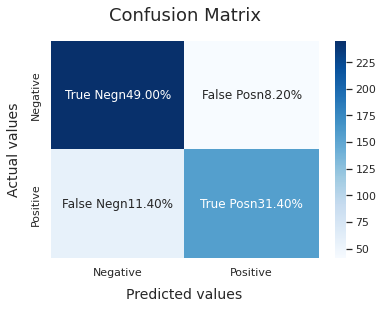

In [ ]:
#logistic regression
model_Evaluate(lr_clf)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       286
           1       0.62      0.61      0.62       214

    accuracy                           0.68       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.68      0.68       500



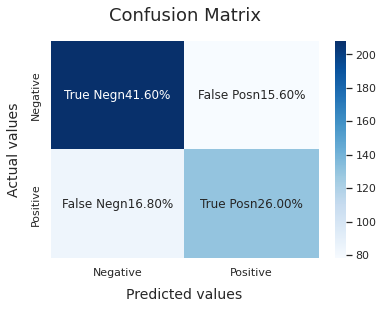

In [ ]:
#decision tree
model_Evaluate(dt_clf)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       286
           1       0.84      0.64      0.72       214

    accuracy                           0.79       500
   macro avg       0.80      0.77      0.78       500
weighted avg       0.80      0.79      0.79       500



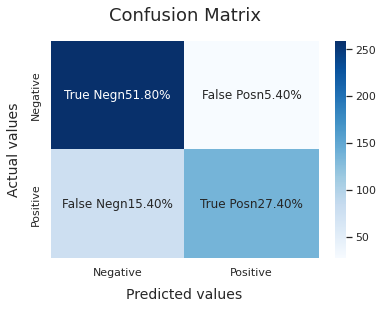

In [ ]:
#random forest
model_Evaluate(rf_clf)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       286
           1       0.84      0.67      0.74       214

    accuracy                           0.80       500
   macro avg       0.81      0.79      0.79       500
weighted avg       0.81      0.80      0.80       500



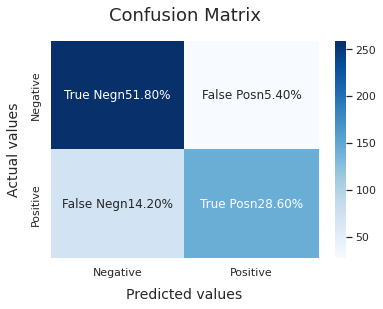

In [ ]:
#gradient boost classifier
model_Evaluate(gb_clf)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       286
           1       0.81      0.70      0.75       214

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.80      0.80       500



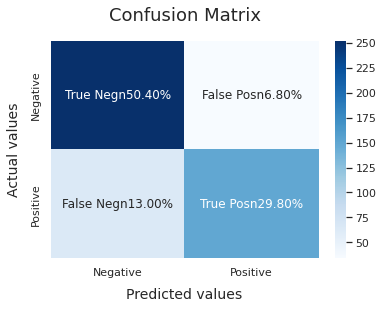

In [ ]:
#XG Boost
model_Evaluate(xgb_model)

#4. GloVe & LSTM

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
pd.options.display.max_colwidth = 200

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Processed training data from Milestone 1
train_data = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')

In [ ]:
train_data.head()

,Unnamed: 0,Keyword,Location,Document,Target
0,0,body bag,new york,new ladies shoulder tote handbag women cross body bag faux leather fashion purse full,0
1,1,detonation,bangalore india,new smp ignition knock detonation sensor ks,0
2,2,fire truck,nevada carson cityfreeman st,rgj truck trailer catches fire reno,1
3,3,derailment,india,helping hand mumbai ttes take charge helpline calm anxious relatives indian exp mumbaitimes,1
4,4,blight,central illinois,wanted see info blight u got,1


In [ ]:
# Going to use text_nav column from training data and also going to remove nulls from it (~6 rows)
train_data2 = train_data[train_data["Document"].notnull()]
train_data2 = train_data2[["Document","Target"]]
np.mean(train_data2['Document'].apply(lambda x: len(x.split())))


8.75418036301272

In [ ]:
# Need to download pre trained glove embeddings, each word is represented by an array of length 100
! pip install Kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d danielwillgeorge/glove6b100dtxt
! unzip glove6b100dtxt.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 89% 117M/131M [00:00<00:00, 193MB/s] 
100% 131M/131M [00:00<00:00, 151MB/s]
Archive:  glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [ ]:
# Parsing the word-cofficients into dictionary
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding='utf-8')
i=0;
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    i=i+1
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization, GlobalMaxPool1D, Bidirectional,TimeDistributed
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
# Limiting vocabulary size to top 20k words (total unique words in our training set are 12.1k so not a concern)
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(train_data2['Document'])


In [ ]:
len(tokenizer.word_index)

13675

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(20000, 100)

In [ ]:
# Average word count of text_nav column is 8, so restricting it to max 30, appended by 0s incase of word count lower than 30
sequences = tokenizer.texts_to_sequences(train_data2['Document'])
data = pad_sequences(sequences, maxlen=30)

In [ ]:
train_data2.shape

(6997, 2)

In [ ]:
max_len=30
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=max_len
                   )
         )
model.add(Bidirectional(LSTM(max_len, return_sequences=True, recurrent_dropout=0.15)))
model.add(GlobalMaxPool1D())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(max_len, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(max_len, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 60)           31440     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 60)               240       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                        

In [ ]:
# Defining Callbacks
# Checkpoints in case our model stops training due to some circumstance - saving progress
checkpoints = ModelCheckpoint('ck_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
# Reducing the learning rate if no improvement in validation loss over 5 epochs
# This is to train the model better
reduce_lr = ReduceLROnPlateau(monitor='val_loss', vactor=0.1, verbose=1, patience=5, min_lr=0.0001)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, np.array(train_data2['Target']), test_size=0.3)

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test), verbose=1, callbacks=[reduce_lr, checkpoints])

Epoch 1/3
154/154 [==============================] - ETA: 0s - loss: 0.6050 - accuracy: 0.6888
Epoch 1: val_loss improved from inf to 0.58232, saving model to ck_model.h5
154/154 [==============================] - 13s 86ms/step - loss: 0.6050 - accuracy: 0.6888 - val_loss: 0.5823 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 2/3
154/154 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.7780
Epoch 2: val_loss improved from 0.58232 to 0.47270, saving model to ck_model.h5
154/154 [==============================] - 12s 79ms/step - loss: 0.4803 - accuracy: 0.7780 - val_loss: 0.4727 - val_accuracy: 0.8081 - lr: 0.0010
Epoch 3/3
154/154 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8236
Epoch 3: val_loss improved from 0.47270 to 0.44382, saving model to ck_model.h5
154/154 [==============================] - 12s 80ms/step - loss: 0.4228 - accuracy: 0.8236 - val_loss: 0.4438 - val_accuracy: 0.8105 - lr: 0.0010


In [ ]:
# Plotting the results
def learning_curve(history, arr):
    fig, ax=plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]])
        ax[idx].set_xlabel('Epochs')
        ax[idx].set_ylabel('Value')
        ax[idx].set_title(arr[idx][0]+' X '+ arr[idx][1])

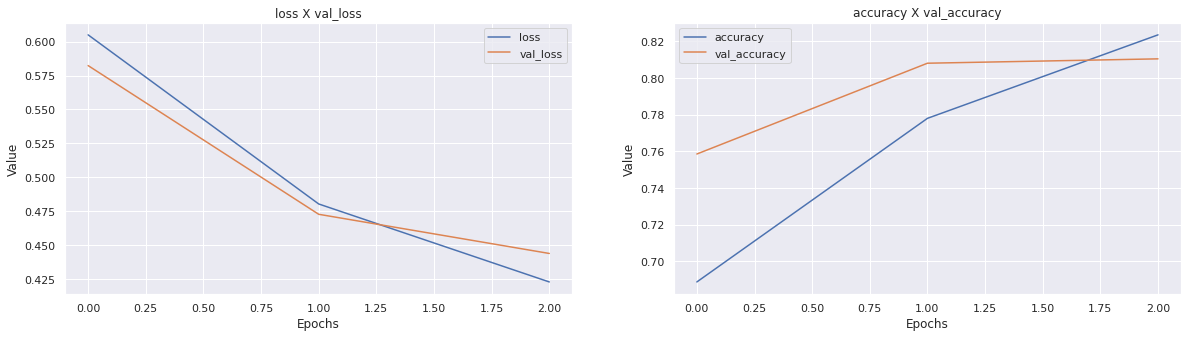

In [ ]:
learning_curve(history, [['loss', 'val_loss'], ['accuracy', 'val_accuracy']])
# Hence we can conclude that 3 epochs, we start to overfit the model

In [ ]:
def metric_calculation(y_test, y_pred):
    print("F1-score: ", f1_score(y_pred, y_test))
    print("Precision: ", precision_score(y_pred, y_test))
    print("Recall: ", recall_score(y_pred, y_test))
    print("Acuracy: ", accuracy_score(y_pred, y_test))
    print("-"*50)
    print(classification_report(y_pred, y_test))

In [ ]:
preds = model.predict(x_test)


66/66 [==============================] - 2s 10ms/step


In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

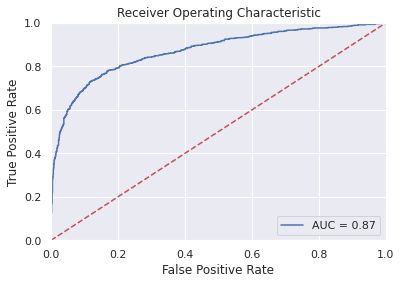

In [ ]:
# ROC - AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]


In [ ]:
preds_binary =  np.where(preds>optimal_threshold,1,0)

In [ ]:
#### Different LSTM model (similar to coding exercise) ####
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=30, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_glove.fit(data, np.array(train_data2['Target']), validation_split=0.4, epochs = 2)

Epoch 1/2
132/132 [==============================] - 7s 24ms/step - loss: 0.5391 - accuracy: 0.7399 - val_loss: 0.4805 - val_accuracy: 0.7835
Epoch 2/2
132/132 [==============================] - 3s 20ms/step - loss: 0.4714 - accuracy: 0.7797 - val_loss: 0.4632 - val_accuracy: 0.7942


#5. Conclusion


*   We trained four models for our Milestone 3: Word2Vec, TF-IDF, Bert, GloVe, and LSTM
* The simplest way we improved model performance is by really cleaning up the dataset we used
* For Word2Vec model, we only used words that shows up more than 2 times
* For Bert model, we added padding and masking to make computation faster
* For GloVe model, we fitted the model over 3 epoches, which improved accuracy from 0.68 to 0.82
* After 3 epochs, we start to overfit the model
* Highest AUC score for Word2Vec model is 0.611
* Highest AUC score for TF-IDF model is 0.855
* Highest AUC score for Bert model is 0.81
* Highest AUC score for GloVe model is 0.87
* We have also experimented with LSTM




#6. Bibliography

*   Visual Guide to BERT by Jay Alammar https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
*   Classification with BERT https://www.tensorflow.org/text/tutorials/classify_text_with_bert

* Overview and benchmark of traditional and deep learning models in text classification https://www.ahmedbesbes.com/blog/benchmarking-sentiment-analysis-models

* Text Classification Using LSTM and visualize Word Embeddings: Part-1. https://sabber.medium.com/classifying-yelp-review-comments-using-lstm-and-word-embeddings-part-1-eb2275e4066b
